## KNN Regressor

Es un método determinado no paramétrico que premirte predecir una variable a promediando las imágenes de sus k vecinos más cercanos, es decir:

$$ y = f(x) + \epsilon, \quad \overline{y} = \frac{1}{k} \sum\limits_{x_i \in N} y_i $$

Para entender el método supongamos que queremos predecir la bmd a partir de la edad. Una prueba de densidad mineral ósea (a veces conocida como BMD, por sus siglas en inglés) mide el calcio y otros minerales en los huesos. Los huesos que contienen más minerales son más densos, por lo que tienden a ser más fuertes y menos propensos a quebrarse.

------------- NA values -------------
id              0
age             0
sex             0
fracture        0
weight_kg       0
height_cm       0
medication      0
waiting_time    0
bmd             0
dtype: int64
------------- Null values -----------
id              0
age             0
sex             0
fracture        0
weight_kg       0
height_cm       0
medication      0
waiting_time    0
bmd             0
dtype: int64
---- Coeficiente de determinación------
El R^2 del modelo es: 0.1767462465944818
---------------------------------------
----El error cuadratico medio------
El MSR del modelo es: 0.022695273830466007
---------------------------------------


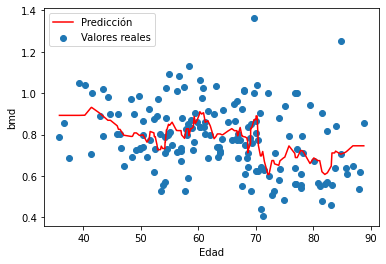

In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.model_selection import KFold, train_test_split
df = pd.read_csv('bmd.csv ')

data = df.copy()
# Chequeo de  NaN y Null
print("------------- NA values -------------")
print(data.isna().sum())
print("------------- Null values -----------")
print(data.isnull().sum())

X = data['age']
y = data['bmd']
X = X.to_numpy()
X = X[:, None]
model = KNeighborsRegressor(n_neighbors= 9)
model.fit(X,y)
y_p = model.predict(X)
D = {'Age': data['age'], 'bmd_P': y_p}
df2 = pd.DataFrame(D)
df2 = df2.sort_values('Age', ignore_index=True)

plt.figure()
plt.plot(df2['Age'], df2['bmd_P'], color='r')
plt.scatter(X, y)
plt.xlabel('Edad')
plt.ylabel('bmd')
plt.legend(['Predicción', 'Valores reales'])

print('---- Coeficiente de determinación------')
print('El R^2 del modelo es: {}'.format(r2_score(y,y_p)))
print('---------------------------------------')

print('----El error cuadratico medio------')
print('El MSR del modelo es: {}'.format(mean_squared_error(y,y_p)))
print('---------------------------------------')

# Algunos aspectos importantes del método

* Puede ser extendido a múltiples carácterísticas.
* Presenta problemas de dimensionalidad. 

![Preview image](Dimensionalidad.PNG)


# Predicción del precio de la casa

In [61]:
P = pd.read_csv('USA_Housing.csv')
P.columns
X = P.drop(['Price','Address'], axis=1)
y = P['Price']
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)

## Estudiemos el efecto de k en el $R^2$ del modelo

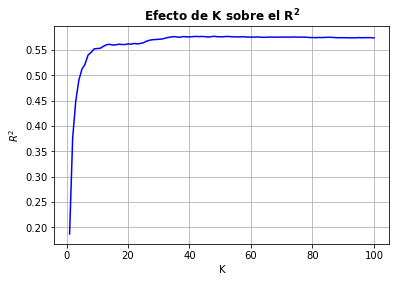

In [80]:
K = list(range(1, 101))
r2 = []
for i in K:
    model_2 = KNeighborsRegressor(n_neighbors=i)
    model_2.fit(x_train,y_train)
    y_p = model_2.predict(x_test)
    r2.append(r2_score(y_test, y_p))

plt.figure()
plt.title('Efecto de K sobre el $\mathbf{R^2}$', fontweight='bold')
plt.plot(K,r2, color='b')
plt.xlabel('K')
plt.ylabel('$R^2$')
plt.grid()


## Tomamos el mejor modelo $K=40$

In [81]:
model_2 = KNeighborsRegressor(n_neighbors=40)
model_2.fit(x_train,y_train)

print('---- El R^2------------')
print(r2_score(y_test, model_2.predict(x_test)))

print('---- El MSR------------')
print(mean_squared_error(y_test, model_2.predict(x_test)))

---- El R^2------------
0.5756884844463857
---- El MSR------------
52476468700.361664
